In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()

import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

import plotly.tools as tls

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection
import pickle


import time

In [2]:
df_train = pd.read_csv('C:/Users/L03107259/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/TEC/Research/Galaxies/Notebooks/SDSS17.csv')

In [3]:
df_train

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
df_train.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'obj_ID', 'spec_obj_ID', 
              'fiber_ID'], axis = 1, inplace = True)

df_train.head(3)

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,55592


In [5]:
df_train.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
MJD         0
dtype: int64

C:\Users\L03107259\Anaconda3\envs\Atoany\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

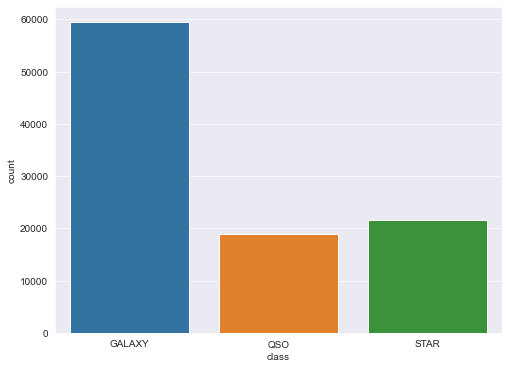

In [6]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))

sns.countplot(df_train['class'])

<AxesSubplot:>

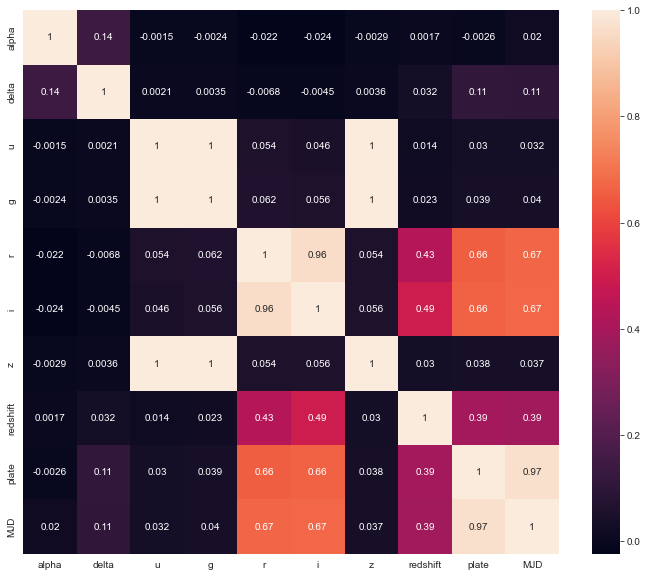

In [7]:
corr = df_train.corr()

plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True)

In [8]:
labels = {'STAR' :1, 'GALAXY': 2, 'QSO': 3}

df_train.replace({'class':labels}, inplace = True)
df_train.head(3)

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,2,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195,4576,55592


In [9]:
df2 = df_train.groupby(['class'])['class'].count()
print(df2)

class
1    21594
2    59445
3    18961
Name: class, dtype: int64


In [10]:
X = df_train.drop('class', axis = 1).values
y = df_train['class'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [12]:
robust = RobustScaler()

X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [13]:
len(X_train)

70000

In [14]:
len(X_test)

30000

## Logistic regression

In [15]:
start = time.time()

lr = LogisticRegression()
lr.fit(X_train, y_train)

end = time.time()
print(end - start)

#Prediction of test set
y_pred = lr.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



2.551901340484619
              precision    recall  f1-score   support

           1       0.95      1.00      0.97      6433
           2       0.96      0.97      0.96     17818
           3       0.95      0.88      0.91      5749

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000



C:\Users\L03107259\Anaconda3\envs\Atoany\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,0,1,2
0,6425,7,1
1,328,17212,278
2,4,662,5083


In [16]:
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)

lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

filename_lr = 'lr_SDSS17_model.sav'
pickle.dump(lr, open(filename_lr, 'wb'))

Training Score:  0.9575
Testing Score:  0.9573333333333334


## Support Vector Machine

In [17]:
start = time.time()

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)



y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



32.517019271850586
              precision    recall  f1-score   support

           1       0.96      1.00      0.98      6433
           2       0.96      0.97      0.97     17818
           3       0.95      0.89      0.92      5749

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.96     30000
weighted avg       0.96      0.96      0.96     30000



,0,1,2
0,6433,0,0
1,249,17302,267
2,2,644,5103


In [18]:
start = time.time()

svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)




y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



152.1118984222412
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6433
           2       0.59      1.00      0.75     17818
           3       1.00      0.01      0.02      5749

    accuracy                           0.60     30000
   macro avg       0.53      0.34      0.25     30000
weighted avg       0.54      0.60      0.45     30000



C:\Users\L03107259\Anaconda3\envs\Atoany\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\L03107259\Anaconda3\envs\Atoany\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\L03107259\Anaconda3\envs\Atoany\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,0,1,2
0,0,6433,0
1,0,17818,0
2,0,5705,44


In [19]:
start = time.time()

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



72.41228914260864
              precision    recall  f1-score   support

           1       0.92      0.91      0.91      6433
           2       0.93      0.96      0.95     17818
           3       0.97      0.87      0.92      5749

    accuracy                           0.93     30000
   macro avg       0.94      0.92      0.93     30000
weighted avg       0.94      0.93      0.93     30000



,0,1,2
0,5875,558,0
1,520,17140,158
2,19,705,5025


In [20]:
start = time.time()

svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = svc.predict(X_test)

reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



92.58797979354858
              precision    recall  f1-score   support

           1       0.87      0.76      0.81      6433
           2       0.88      0.95      0.92     17818
           3       0.97      0.85      0.91      5749

    accuracy                           0.89     30000
   macro avg       0.91      0.86      0.88     30000
weighted avg       0.90      0.89      0.89     30000



,0,1,2
0,4898,1534,1
1,646,16999,173
2,55,789,4905


## KNN

In [21]:
start = time.time()

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = neigh.predict(X_test)

neigh_train_acc = neigh.score(X_train, y_train)
print('Training Score: ', neigh_train_acc)

neigh_test_acc = neigh.score(X_test, y_test)
print('Testing Score: ', neigh_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)

CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()




0.15674304962158203
Training Score:  0.9623571428571429
Testing Score:  0.9506333333333333
              precision    recall  f1-score   support

           1       0.93      0.94      0.93      6433
           2       0.95      0.96      0.96     17818
           3       0.97      0.92      0.94      5749

    accuracy                           0.95     30000
   macro avg       0.95      0.94      0.94     30000
weighted avg       0.95      0.95      0.95     30000



,0,1,2
0,6055,378,0
1,439,17188,191
2,37,436,5276


## Decision Tree

In [27]:
start = time.time()

dtc = DecisionTreeClassifier(random_state=0, max_depth=10, criterion='entropy')
dtc.fit(X_train, y_train)

end = time.time()
print(end - start)

y_pred = dtc.predict(X_test)


dtc_train_acc = dtc.score(X_train, y_train)
print('Training Score: ', dtc_train_acc)

dtc_test_acc = dtc.score(X_test, y_test)
print('Testing Score: ', dtc_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)


CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()



0.7818677425384521
Training Score:  0.9829
Testing Score:  0.9751333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6433
           2       0.97      0.98      0.98     17818
           3       0.95      0.93      0.94      5749

    accuracy                           0.98     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



,0,1,2
0,6408,24,1
1,27,17524,267
2,1,426,5322


In [19]:
filename_dt = 'dt_SDSS17_model.sav'
pickle.dump(dtc, open(filename_dt, 'wb'))

## Random Forest

In [20]:
start = time.time()

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)

rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)


CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()

end = time.time()
print(end - start)

Training Score:  0.9048714285714285
Testing Score:  0.9047666666666667
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      6433
           2       0.87      0.98      0.92     17818
           3       0.94      0.57      0.71      5749

    accuracy                           0.90     30000
   macro avg       0.93      0.85      0.87     30000
weighted avg       0.91      0.90      0.90     30000

4.501978158950806


## Adaboost

In [21]:
start = time.time()

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)


ada_train_acc = ada.score(X_train, y_train)
print('Training Score: ', ada_train_acc)

ada_test_acc = ada.score(X_test, y_test)
print('Testing Score: ', ada_test_acc)


reporte = classification_report(y_test, y_pred)
print(reporte)


CF = confusion_matrix(y_test, y_pred)
df_cf = pd.DataFrame(CF)

df_cf.style.background_gradient()

end = time.time()
print(end - start)

Training Score:  0.6308
Testing Score:  0.6298
              precision    recall  f1-score   support

           1       0.99      0.30      0.46      6433
           2       0.63      0.94      0.75     17818
           3       0.20      0.05      0.08      5749

    accuracy                           0.63     30000
   macro avg       0.61      0.43      0.43     30000
weighted avg       0.62      0.63      0.56     30000

12.78596568107605
